#  Week #8  -  Python Practice

### Slicing, Dicing, Transforming

In [1]:
import os

import pickle

import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

import sqlalchemy

from pandas import DataFrame, Series, Categorical     # for convenience
from sqlalchemy import create_engine
from sqlalchemy import schema
from sqlalchemy import inspect 	# helps us look at the tables in xyz.db


In [2]:
engine=create_engine('sqlite:///xyz.db')	    # the db is in my current working directory

In [3]:
xyztrans=pd.read_sql('xyztrans', engine)

In [4]:
xyztrans.columns

Index(['index', 'ACCTNO', 'QTY', 'TRANDATE', 'TRAN_CHANNEL', 'PRICE', 'TOTAMT',
       'ORDERNO', 'DEPTDESCR'],
      dtype='object')

In [5]:
xyztrans.TRANDATE.head()

0    09JUN2009
1    09JUN2009
2    28NOV2009
3    28NOV2009
4    28NOV2009
Name: TRANDATE, dtype: object

In [6]:
trandate=xyztrans.TRANDATE	# should be a Series

daystr=trandate.str[0:2]		# two digit date numbers slice

mostr=trandate.str[2:5]		# the three letter month abbreviations

yearstr=trandate.str[5:]		# four digit years


In [7]:
mostr.head()

0    JUN
1    JUN
2    NOV
3    NOV
4    NOV
Name: TRANDATE, dtype: object

In [8]:
#create a dictionary for the months
monums={'JAN':'1', 'FEB':'2', 'MAR':'3', 'APR':'4', 'MAY':'5', 'JUN':'6', 'JUL':'7', 'AUG':'8', 'SEP':'9', 'OCT':'10', 'NOV':'11','DEC':'12'}
#month
monos=mostr.map(monums)	# do a dict lookup for each value of mostr

In [9]:
monos.head()

0     6
1     6
2    11
3    11
4    11
Name: TRANDATE, dtype: object

In [10]:
transtr=yearstr+'-'+monos+'-'+daystr

In [11]:
trDateTime=pd.to_datetime(transtr)

In [12]:
type(trDateTime)

pandas.core.series.Series

In [13]:
trDateTime.head()

0   2009-06-09
1   2009-06-09
2   2009-11-28
3   2009-11-28
4   2009-11-28
Name: TRANDATE, dtype: datetime64[ns]

In [14]:

trCounts=trDateTime.value_counts()

In [15]:
trCounts.head()

2009-12-19    877
2009-12-21    836
2009-12-12    782
2009-12-23    765
2009-12-20    744
Name: TRANDATE, dtype: int64

In [16]:
import seaborn as sns

In [17]:
newIndex=pd.date_range(trCounts.index.min(),trCounts.index.max())

trCountsChrono=trCounts.reindex(index=newIndex)


In [18]:
trCountsChrono.head()

2009-01-01    176
2009-01-02    305
2009-01-03    365
2009-01-04    231
2009-01-05    144
Freq: D, Name: TRANDATE, dtype: int64

In [19]:
trCountsChrono.tail()

2009-12-27    251
2009-12-28    196
2009-12-29    158
2009-12-30    217
2009-12-31    279
Freq: D, Name: TRANDATE, dtype: int64

In [20]:
trCountsChrono.shape

(365,)

C:\Users\Atef\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


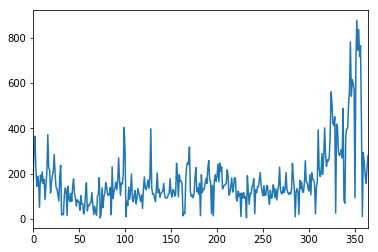

In [21]:
sns.tsplot(trCountsChrono)

In [22]:
trCountsChrono.loc['2009-05-05' : '2009-05-15'] 	# an index labels slice

2009-05-05    146
2009-05-06    173
2009-05-07    136
2009-05-08    183
2009-05-09    398
2009-05-10    139
2009-05-11    109
2009-05-12    112
2009-05-13     93
2009-05-14     76
2009-05-15    133
Freq: D, Name: TRANDATE, dtype: int64

In [23]:
trCountsChrono.loc['2009-05-01' : '2009-05-03'] 	# an index labels slice

2009-05-01    136
2009-05-02    186
2009-05-03    136
Freq: D, Name: TRANDATE, dtype: int64

In [24]:
trCountsChrono.iloc[124:135]		#  locational slice using .ilocs

2009-05-05    146
2009-05-06    173
2009-05-07    136
2009-05-08    183
2009-05-09    398
2009-05-10    139
2009-05-11    109
2009-05-12    112
2009-05-13     93
2009-05-14     76
2009-05-15    133
Freq: D, Name: TRANDATE, dtype: int64

In [25]:
trCountsChrono[(trCountsChrono.index.month==6) & (trCountsChrono>=100)]

2009-06-02    130
2009-06-03    127
2009-06-04    101
2009-06-05    111
2009-06-06    246
2009-06-07    188
2009-06-09    196
2009-06-10    167
2009-06-11    168
2009-06-12    154
2009-06-16    173
2009-06-17    232
2009-06-18    250
2009-06-19    241
2009-06-20    318
2009-06-21    122
2009-06-22    100
2009-06-23    107
2009-06-25    111
2009-06-26    181
2009-06-27    227
2009-06-28    120
2009-06-29    137
2009-06-30    110
Name: TRANDATE, dtype: int64

In [26]:
xyzcust=pd.read_sql_table('xyzcust',engine)

xyzcust.columns

Index(['index', 'ACCTNO', 'ZIP', 'ZIP4', 'LTD_SALES', 'LTD_TRANSACTIONS',
       'YTD_SALES_2009', 'YTD_TRANSACTIONS_2009', 'CHANNEL_ACQUISITION',
       'BUYER_STATUS', 'ZIP9_SUPERCODE'],
      dtype='object')

In [27]:
xyzcust.shape

(30179, 11)

In [28]:
matchVals={'heavyCat':['heavy'],'CHANNEL_ACQUISITION':['RT','IB']}  

In [29]:
xyzcust.matches=xyzcust.isin(matchVals).all(1)   # .isin works for DataFrames
xyzHeavyRTIB=xyzcust[xyzcust.matches]	# Just heavies from RT or IB


In [30]:
from sqlalchemy import *

engine=create_engine('sqlite:///xyz.db')		# see what type(engine) tells you

meta=MetaData()			# will hold metadata of xyz.db.  What type?

meta.bind=engine		# bind the metadata of xyz.db


In [31]:
xyzcustTable=Table('xyzcustnew',meta)

In [32]:
xyztransTable=Table('xyztransnew', meta)

In [33]:
meta.tables

immutabledict({'xyzcustnew': Table('xyzcustnew', MetaData(bind=Engine(sqlite:///xyz.db)), schema=None), 'xyztransnew': Table('xyztransnew', MetaData(bind=Engine(sqlite:///xyz.db)), schema=None)})

In [34]:
simpleTab=Table('simpleTab',meta,Column('data',Float))

In [35]:
simpleTab.create(bind=engine)

In [36]:
meta.tables

immutabledict({'xyzcustnew': Table('xyzcustnew', MetaData(bind=Engine(sqlite:///xyz.db)), schema=None), 'xyztransnew': Table('xyztransnew', MetaData(bind=Engine(sqlite:///xyz.db)), schema=None), 'simpleTab': Table('simpleTab', MetaData(bind=Engine(sqlite:///xyz.db)), Column('data', Float(), table=<simpleTab>), schema=None)})

In [37]:
indata=simpleTab.insert()


In [38]:
rttrans=pd.read_sql_query("SELECT * FROM simpleTab", engine)


In [39]:
indata.execute({'data': 10}, {'data' : 20}, {'data' : 30})

In [40]:
outdata=simpleTab.select()

In [41]:
rout=outdata.execute()

In [42]:
rout.fetchall()

[(10.0,), (20.0,), (30.0,)]

In [43]:
insp=inspect(engine)
insp.get_table_names()

['simpleTab', 'xyzcust', 'xyztrans']

In [44]:
simpleTab.drop(bind=engine)

In [45]:
insp=inspect(engine)
insp.get_table_names()

['xyzcust', 'xyztrans']

# Deliverable #1: Get the list of the sales on the first day of every month 

# Deliverable #2: Get the list of the sales on the first day of every month where that day of that  month had at least 150 sales transactions.